# Selecting starting points for an optimisation

In the previous chapter we defined boundaries on the parameter space, using both univariate boundaries (lower and upper bounds on the individual parameters $p_1$ to $p_9$), and multivariate boundaries (restrictions on the maximum rate coefficients, leading to restrictions on the pairs $(p_1, p_2)$, $(p_3, p_4)$, $(p_5, p_6)$, and $(p_7, p_8)$.

In this part of the tutorial we show how these boundaries can be used to randomly sample points to use as starting points for an optimisation.

## Sampling from univariate boundaries


We start by defining the univariate boundaries, and creating a method to plot them:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Define the boundaries on the parameters and maximum rate coefficients
a_min, a_max = 1e-7, 1e3
b_min, b_max = 1e-7, 0.4
g_min, g_max = 0.1, 1

def boundary_plot(alog=False, blog=False):

    # Create a figure
    fig = plt.figure(figsize=(16, 2.6))
    fig.subplots_adjust(wspace=0.4)
    
    def prepare_panel(ax):
        if alog:
            ax.set_xscale('log')
            ax.set_xlim(1e-8, 7e3)
        else:
            ax.set_xlim(-200, 1.2e3)
        if blog:
            ax.set_yscale('log')
            ax.set_ylim(2e-8, 2)
        else:
            ax.set_ylim(-0.1, 0.5)
        ax.axvline(a_min, color='#bbbbbb')
        ax.axvline(a_max, color='#bbbbbb')
        ax.axhline(b_min, color='#bbbbbb')
        ax.axhline(b_max, color='#bbbbbb')        

    ax1 = fig.add_subplot(1, 5, 1)
    prepare_panel(ax1)
    ax1.set_xlabel('p1')
    ax1.set_ylabel('p2')

    ax2 = fig.add_subplot(1, 5, 2)
    prepare_panel(ax2)
    ax2.set_xlabel('p3')
    ax2.set_ylabel('p4')

    ax3 = fig.add_subplot(1, 5, 3)
    prepare_panel(ax3)
    ax3.set_xlabel('p5')
    ax3.set_ylabel('p6')

    ax4 = fig.add_subplot(1, 5, 4)
    prepare_panel(ax4)
    ax4.set_xlabel('p7')
    ax4.set_ylabel('p8')
    
    ax5 = fig.add_subplot(1, 5, 5)
    ax5.set_xlabel('p9')
    ax5.set_xlim(0, g_max * 1.1)
    ax5.set_ylim(-2.2, 2.2)
    ax5.axvline(g_min, color='#bbbbbb')
    ax5.axvline(g_max, color='#bbbbbb')
    
    return ax1, ax2, ax3, ax4, ax5

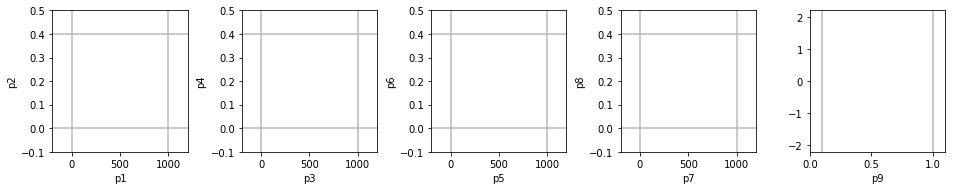

In [2]:
ax1, ax2, ax3, ax4, ax5 = boundary_plot()
plt.show()

Sampling from these boundaries is easy: we simply define an array of lower and upper bounds (see previous tutorial), and sample uniformly from within them:

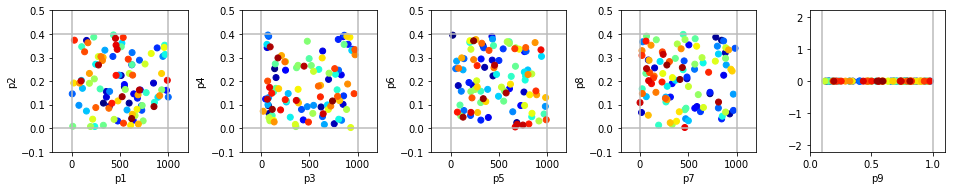

In [3]:
# Define arrays for the lower and upper bounds
lower = np.array([a_min, b_min, a_min, b_min, a_min, b_min, a_min, b_min, g_min])
upper = np.array([a_max, b_max, a_max, b_max, a_max, b_max, a_max, b_max, g_max])

# Sample points from within the univariate boundaries
n_points = 100
points = np.random.uniform(lower, upper, size=(n_points, 9))

# Choose colours for all the points
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(0, n_points)
color = cmap(norm(np.arange(n_points)))

# Plot the points, making sure point i has the same color in each panel
ax1, ax2, ax3, ax4, ax5 = boundary_plot()
ax1.scatter(points[:, 0], points[:, 1], color=color)
ax2.scatter(points[:, 2], points[:, 3], color=color)
ax3.scatter(points[:, 4], points[:, 5], color=color)
ax4.scatter(points[:, 6], points[:, 7], color=color)
ax5.scatter(points[:, 8], np.zeros(n_points), color=color)
plt.show()

We see the points are more or less evenly distributed, and there is no obvious correlation between the position of the points in the different panels (i.e. $p_j$ does not depend on $p_i$ for $i \ne j$).

However, there still might be a problem with sampling this way.
We defined boundaries on the "a-type" parameters $p_{1,3,5,7}$ as ranging over several orders of magnitude, going from $10^{-7}$ up to $10^3$.
However, sampling uniformly between these bounds strongly favours the higher orders of magnitude: getting a point on the interval $[1, 1000]$ is about 999 times more likely than getting a point on the interval $[10^{-7}, 1]$.

In [4]:
print((1000 - 1) / (1 - 1e-7))

999.0000999000099


We can see how our points are distributed in "orders of magnitude-space" by plotting with a logarithmic x-axis:

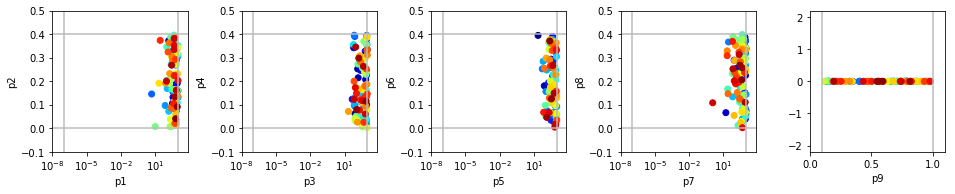

In [5]:
# Plot the points with a logarithmic x axis
ax1, ax2, ax3, ax4, ax5 = boundary_plot(alog=True)
ax1.scatter(points[:, 0], points[:, 1], color=color)
ax2.scatter(points[:, 2], points[:, 3], color=color)
ax3.scatter(points[:, 4], points[:, 5], color=color)
ax4.scatter(points[:, 6], points[:, 7], color=color)
ax5.scatter(points[:, 8], np.zeros(n_points), color=color)
plt.show()

So instead of sampling uniformly, we might want to consider sampling with logarithmic spacing:

In [6]:
# Define new arrays with the a-type parameters in log space
lower2 = np.copy(lower)
lower2[0] = np.log(lower[0])
lower2[2] = np.log(lower[2])
lower2[4] = np.log(lower[4])
lower2[6] = np.log(lower[6])
upper2 = np.copy(upper)
upper2[0] = np.log(upper[0])
upper2[2] = np.log(upper[2])
upper2[4] = np.log(upper[4])
upper2[6] = np.log(upper[6])

# Sample uniformly with transformed a-type parameters
points2 = np.random.uniform(lower2, upper2, size=(n_points, 9))

# Detransform the a-type parameters
points2[:, 0] = np.exp(points2[:, 0])
points2[:, 2] = np.exp(points2[:, 2])
points2[:, 4] = np.exp(points2[:, 4])
points2[:, 6] = np.exp(points2[:, 6])

Which looks great on a semilog plot:

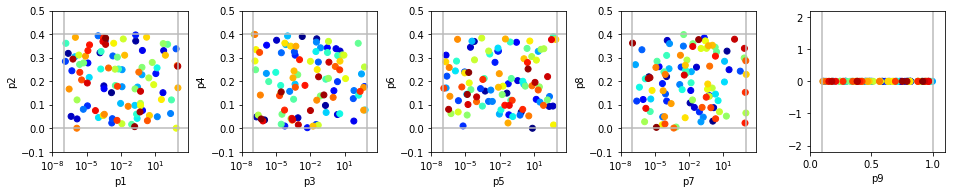

In [7]:
ax1, ax2, ax3, ax4, ax5 = boundary_plot(alog=True)
ax1.scatter(points2[:, 0], points2[:, 1], color=color)
ax2.scatter(points2[:, 2], points2[:, 3], color=color)
ax3.scatter(points2[:, 4], points2[:, 5], color=color)
ax4.scatter(points2[:, 6], points2[:, 7], color=color)
ax5.scatter(points2[:, 8], np.zeros(n_points), color=color)
plt.show()

But a bit weird in untransformed space:

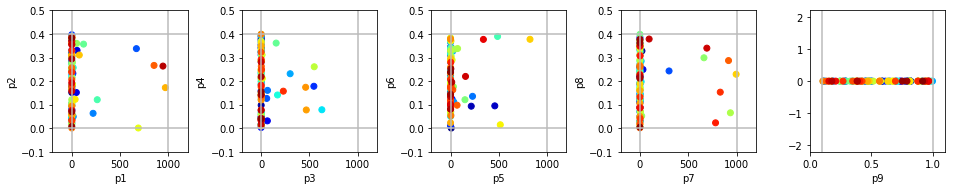

In [8]:
ax1, ax2, ax3, ax4, ax5 = boundary_plot()
ax1.scatter(points2[:, 0], points2[:, 1], color=color)
ax2.scatter(points2[:, 2], points2[:, 3], color=color)
ax3.scatter(points2[:, 4], points2[:, 5], color=color)
ax4.scatter(points2[:, 6], points2[:, 7], color=color)
ax5.scatter(points2[:, 8], np.zeros(n_points), color=color)
plt.show()

A similar argument can be made for the "b-type" parameters, so we might also want to consider a log-log space:

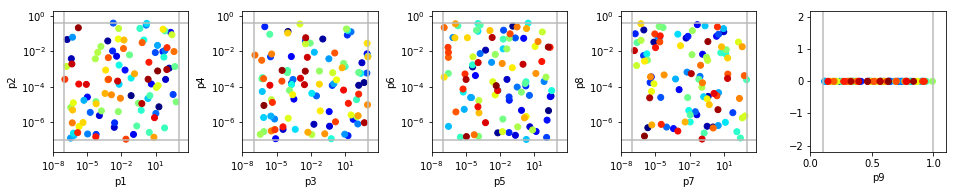

In [9]:
# Define new arrays with the a-type parameters in log space
lower3 = np.copy(lower)
lower2[0:8] = np.log(lower[0:8])
upper2 = np.copy(upper)
upper2[0:8] = np.log(upper[0:8])

# Sample uniformly with transformed a and b-type parameters
points3 = np.random.uniform(lower2, upper2, size=(n_points, 9))

# Detransform
points3[:, 0:8] = np.exp(points3[:, 0:8])

# Plot
ax1, ax2, ax3, ax4, ax5 = boundary_plot(alog=True, blog=True)
ax1.scatter(points3[:, 0], points3[:, 1], color=color)
ax2.scatter(points3[:, 2], points3[:, 3], color=color)
ax3.scatter(points3[:, 4], points3[:, 5], color=color)
ax4.scatter(points3[:, 6], points3[:, 7], color=color)
ax5.scatter(points3[:, 8], np.zeros(n_points), color=color)
plt.show()

However, experiments in the supplement to ["Four ways to fit an ion channel model"](https://doi.org/10.1016/j.bpj.2019.08.001) (section S2.4.2) show that _transforming only the a-type parameters_ gave the most reliable optimisation results (i.e. led to the highest proportion of optimisations finding the true (or best) result).


## Sample from complex boundaries


We now repeat the sampling procedure, but taking the multivariate boundaries (the restrictions on the maximum rate coefficients) into account.

We'll start by defining a multivariate boundary object, as shown in the previous tutorial:

In [10]:
import pints

class AdvancedBoundaries(pints.Boundaries):
    """
    A boundaries object that implements the maximum-rate boundaries used in Beattie et al.
    
    Parameters
    ----------
    g_min
        A cell-specific lower boundary on the conductance.    
    """
    
    def __init__(self, g_min):
        self.a_min = 1e-7
        self.a_max = 1e3
        self.b_min = 1e-7
        self.b_max = 0.4
        self.km_min = 1.67e-5
        self.km_max = 1e3
        self.g_min = g_min
        self.g_max = 10 * g_min
        self.v_low = -120
        self.v_high = 60
        
        # Univariate paramater bounds
        self.lower = np.array([
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.g_min,
        ])          
        self.upper = np.array([
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.g_max,
        ])
        
    def n_parameters(self):
        return 9
    
    def check(self, parameters):
        
        # Check parameter boundaries
        if np.any(parameters <= self.lower) or np.any(parameters >= self.upper):
            return False
        
        # Check rate boundaries
        k1m = parameters[0] * np.exp(parameters[1] * self.v_high)
        if k1m <= self.km_min or k1m >= self.km_max:
            return False
        k2m = parameters[2] * np.exp(-parameters[3] * self.v_low)
        if k2m <= self.km_min or k2m >= self.km_max:
            return False
        k3m = parameters[4] * np.exp(parameters[5] * self.v_high)
        if k3m <= self.km_min or k3m >= self.km_max:
            return False
        k4m = parameters[6] * np.exp(-parameters[7] * self.v_low)
        if k4m <= self.km_min or k4m >= self.km_max:
            return False
        
        # All tests passed!
        return True

Adn we'll also define an updated plotting function, so that we can see what's going on:

In [11]:
# Define the boundaries on the parameters and maximum rate coefficients
a_min, a_max = 1e-7, 1e3
b_min, b_max = 1e-7, 0.4
km_min, km_max = 1.67e-5, 1e3

def boundary_plot(alog=False):

    # Define a range on which to plot the rate coefficient boundaries
    if alog:
        # We use a range that's linear in the log-transformed space
        px = np.exp(np.linspace(np.log(a_min), np.log(a_max), 200))
    else:
        px = np.linspace(a_min, a_max, 200)

    # Calculate the lower and upper boundaries on p2 and p4 (which are the same as those on p6 and p8)
    p2_min = np.log(km_min / px) / 60
    p2_max = np.log(km_max / px) / 60
    p4_min = np.log(km_min / px) / 120
    p4_max = np.log(km_max / px) / 120

    # But p2,p6 and p4,p8 are also bounded by the parameter boundaries, so add that in too:
    p2_min = np.maximum(p2_min, b_min)
    p4_min = np.maximum(p4_min, b_min)

    # Create a figure
    fig = plt.figure(figsize=(16, 2.6))
    fig.subplots_adjust(wspace=0.4)
    
    def prepare_panel(ax):
        if alog:
            ax.set_xscale('log')
            ax.set_xlim(3e-8, 3e3)
        else:
            ax.set_xlim(-50, 1.05e3)
        ax.set_ylim(-0.02, 0.42)
        ax.axvline(a_min, color='#bbbbbb')
        ax.axvline(a_max, color='#bbbbbb')
        ax.axhline(b_min, color='#bbbbbb')
        ax.axhline(b_max, color='#bbbbbb')        

    ax1 = fig.add_subplot(1, 5, 1)
    prepare_panel(ax1)
    ax1.set_xlabel('p1')
    ax1.set_ylabel('p2')
    ax1.plot(px, p2_min)
    ax1.plot(px, p2_max)
    ax1.fill_between(px, p2_min, p2_max, color='#dddddd')

    ax2 = fig.add_subplot(1, 5, 2)
    prepare_panel(ax2)
    ax2.set_xlabel('p3')
    ax2.set_ylabel('p4')
    ax2.plot(px, p4_min)
    ax2.plot(px, p4_max)
    ax2.fill_between(px, p4_min, p4_max, color='#dddddd')

    ax3 = fig.add_subplot(1, 5, 3)
    prepare_panel(ax3)
    ax3.set_xlabel('p5')
    ax3.set_ylabel('p6')
    ax3.plot(px, p2_min)
    ax3.plot(px, p2_max)
    ax3.fill_between(px, p2_min, p2_max, color='#dddddd')

    ax4 = fig.add_subplot(1, 5, 4)
    prepare_panel(ax4)
    ax4.set_xlabel('p7')
    ax4.set_ylabel('p8')
    ax4.plot(px, p4_min)
    ax4.plot(px, p4_max)
    ax4.fill_between(px, p4_min, p4_max, color='#dddddd')
    
    ax5 = fig.add_subplot(1, 5, 5)
    ax5.set_xlabel('p9')
    ax5.set_xlim(0, g_max * 1.1)
    ax5.set_ylim(-2.2, 2.2)
    ax5.axvline(g_min, color='#bbbbbb')
    ax5.axvline(g_max, color='#bbbbbb')
    
    return ax1, ax2, ax3, ax4, ax5

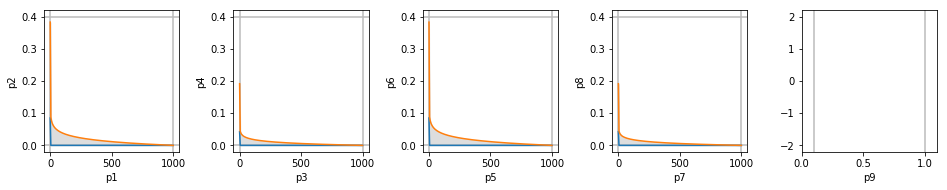

In [12]:
boundary_plot()
plt.show()

To sample points in this space we'll use the following strategy:

1. Sample a point within the univariate boundaries
2. If the point is within the multivariate boundaries, return it, if not, restart from step 1

Let's try it for a few points:

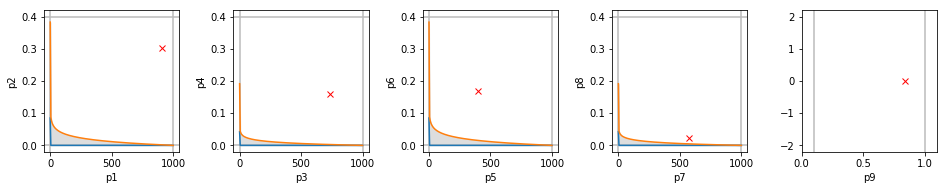

In [13]:
# Create the boundaries
boundaries = AdvancedBoundaries(g_min=0.1)

# Take a sample
x = np.random.uniform(lower, upper)

# Create a plot
ax1, ax2, ax3, ax4, ax5 = boundary_plot()
if boundaries.check(x):
    style = 'bo'
else:
    style = 'rx'
ax1.plot(x[0], x[1], style)
ax2.plot(x[2], x[3], style)
ax3.plot(x[4], x[5], style)
ax4.plot(x[6], x[7], style)
ax5.plot(x[8], 0, style)

plt.show()

Looking at the plot, it's clear that the OK area is pretty small in the untransformed space, so our chances of hitting it are quite small.
Even worse, we need to be within the boundaries on all four parameter pairs!
So if the chance of getting it right on $p_1$ and $p_2$ is $P_\text{pos}$, and the chance of getting it right on $p_3$ and $p_4$ is $P_\text{neg}$, the total chance of getting a point within the boundaries is $P_\text{pos}^2P_\text{neg}^2$.
This looks to be a pretty small number, which we can confirm by trying our strategy in a loop:

In [14]:
def sample():
    for i in range(10000):
        x = np.random.uniform(lower, upper)
        if boundaries.check(x):
            return x
    print('Too many iterations reached!')
    
sample()
sample()
sample()

Too many iterations reached!
Too many iterations reached!
Too many iterations reached!


To increase our chances, we'll try sampling in each quadrant _separately_, but this requires a bit more coding:

In [15]:
def sample_partial(v):
    for i in range(1000):
        a = np.random.uniform(a_min, a_max)
        b = np.random.uniform(b_min, b_max)
        km = a * np.exp(b * v)
        if km > km_min and km < km_max:
            print('Found a pair in ' + str(i) + ' iteration(s)')
            return a, b
    raise ValueError('Too many iterations')

def sample():
    p1, p2 = sample_partial(60)
    p3, p4 = sample_partial(120)
    p5, p6 = sample_partial(60)
    p7, p8 = sample_partial(120)
    p9 = np.random.uniform(g_min, g_max)
    return np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])

x = sample()        

Found a pair in 8 iteration(s)
Found a pair in 10 iteration(s)
Found a pair in 31 iteration(s)
Found a pair in 39 iteration(s)


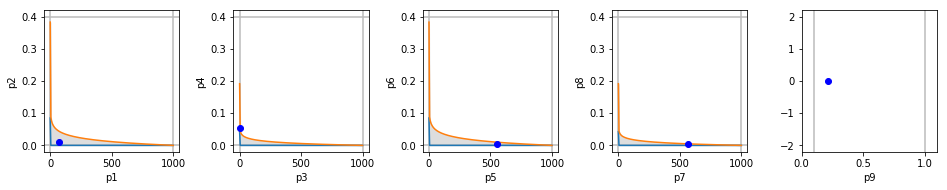

In [16]:
# Create a plot
ax1, ax2, ax3, ax4, ax5 = boundary_plot()
ax1.plot(x[0], x[1], 'bo')
ax2.plot(x[2], x[3], 'bo')
ax3.plot(x[4], x[5], 'bo')
ax4.plot(x[6], x[7], 'bo')
ax5.plot(x[8], 0, 'bo')

plt.show()

But, as shown in ["Four ways to fit an ion channel model"](https://doi.org/10.1016/j.bpj.2019.08.001), we can increase our chances of a successful optimisation by sampling the "a-type" parameters in a logarithmicly transformed space:

In [17]:
def sample_partial(v, show_iterations):
    for i in range(100):
        a = np.exp(np.random.uniform(np.log(a_min), np.log(a_max)))
        b = np.random.uniform(b_min, b_max)
        km = a * np.exp(b * v)
        if km > km_min and km < km_max:
            if show_iterations:
                print('Found a pair in ' + str(i) + ' iteration(s)')
            return a, b
    raise ValueError('Too many iterations')

def sample(show_iterations=True):
    p1, p2 = sample_partial(60, show_iterations)
    p3, p4 = sample_partial(120, show_iterations)
    p5, p6 = sample_partial(60, show_iterations)
    p7, p8 = sample_partial(120, show_iterations)
    p9 = np.random.uniform(g_min, g_max)
    return np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])

x = sample()

Found a pair in 4 iteration(s)
Found a pair in 2 iteration(s)
Found a pair in 0 iteration(s)
Found a pair in 6 iteration(s)


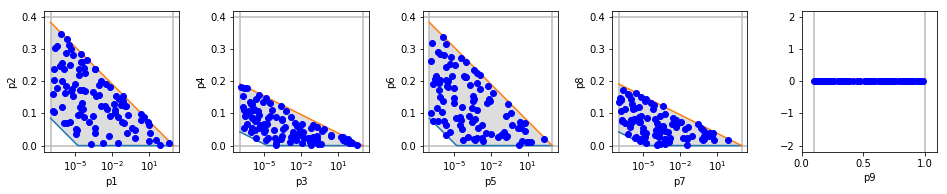

In [18]:
# Create a plot
ax1, ax2, ax3, ax4, ax5 = boundary_plot(alog=True)

for i in range(100):
    x = sample(show_iterations=False)
    ax1.plot(x[0], x[1], 'bo')
    ax2.plot(x[2], x[3], 'bo')
    ax3.plot(x[4], x[5], 'bo')
    ax4.plot(x[6], x[7], 'bo')
    ax5.plot(x[8], 0, 'bo')

plt.show()

## Implementing sampling in a Boundaries object

Finally, we show how to embed the sampling method above in a class implementing the `pints.Boundaries` object, which defines the `sample(n)` method for this purpose:

In [19]:
class SuperBoundaries(pints.Boundaries):
    """
    A boundaries class that implements the maximum-rate boundaries used in Beattie et al.
    
    Parameters
    ----------
    g_min
        A cell-specific lower boundary on the conductance.    
    """
    
    def __init__(self, g_min):
        self.a_min = 1e-7
        self.a_max = 1e3
        self.b_min = 1e-7
        self.b_max = 0.4
        self.km_min = 1.67e-5
        self.km_max = 1e3
        self.g_min = g_min
        self.g_max = 10 * g_min
        self.v_low = -120
        self.v_high = 60
        
        # Univariate paramater bounds
        self.lower = np.array([
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.a_min, self.b_min,
            self.g_min,
        ])          
        self.upper = np.array([
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.a_max, self.b_max,
            self.g_max,
        ])
        
    def n_parameters(self):
        return 9
    
    def check(self, parameters):
        
        # Check parameter boundaries
        if np.any(parameters <= self.lower) or np.any(parameters >= self.upper):
            return False
        
        # Check rate boundaries
        k1m = parameters[0] * np.exp(parameters[1] * self.v_high)
        if k1m <= self.km_min or k1m >= self.km_max:
            return False
        k2m = parameters[2] * np.exp(-parameters[3] * self.v_low)
        if k2m <= self.km_min or k2m >= self.km_max:
            return False
        k3m = parameters[4] * np.exp(parameters[5] * self.v_high)
        if k3m <= self.km_min or k3m >= self.km_max:
            return False
        k4m = parameters[6] * np.exp(-parameters[7] * self.v_low)
        if k4m <= self.km_min or k4m >= self.km_max:
            return False
        
        # All tests passed!
        return True

    def _sample_partial(self, v):
        """Samples a pair of kinetic parameters"""
        for i in range(100):
            a = np.exp(np.random.uniform(np.log(self.a_min), np.log(self.a_max)))
            b = np.random.uniform(self.b_min, self.b_max)
            km = a * np.exp(b * v)
            if km > self.km_min and km < self.km_max:
                return a, b
        raise ValueError('Too many iterations')

    def sample(self, n=1):
        points = np.zeros((n, 9))
        for i in range(n):
            points[i, 0:2] = self._sample_partial(self.v_high)
            points[i, 2:4] = self._sample_partial(-self.v_low)
            points[i, 4:6] = self._sample_partial(self.v_high)
            points[i, 6:8] = self._sample_partial(-self.v_low)
            points[i, 8] = np.random.uniform(self.g_min, self.g_max)
        return points


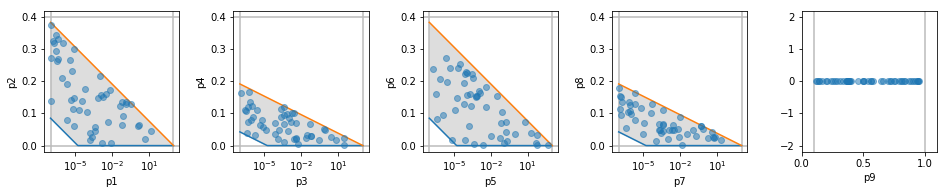

In [20]:
boundaries = SuperBoundaries(g_min=0.1)

ax1, ax2, ax3, ax4, ax5 = boundary_plot(alog=True)

x = boundaries.sample(50)
ax1.plot(x[:, 0], x[:, 1], 'o', color='tab:blue', alpha=0.5)
ax2.plot(x[:, 2], x[:, 3], 'o', color='tab:blue', alpha=0.5)
ax3.plot(x[:, 4], x[:, 5], 'o', color='tab:blue', alpha=0.5)
ax4.plot(x[:, 6], x[:, 7], 'o', color='tab:blue', alpha=0.5)
ax5.plot(x[:, 8], 0 * x[:, 8], 'o', color='tab:blue', alpha=0.5)

plt.show()

## Importance of repeated fits

Using the boundaries-with-sampling object defined above, we can run fitting experiments repeatedly, from different starting points:

1. Sample $x_0[i]$ from within the boundaries
2. Run an optimisation, starting from $x_0[i]$
3. Store the resulting lowest error $f_\text{opt}[i]$ and best position $x_\text{opt}[i]$

When working with real data, where the "true" solution is unknown, repeated fits are crucial to test the reliability of the obtained results.
We recommend the following strategy:

1. Run at least 50 repeats, and plot the results from each in a boundary plot as shown above.
2. Identify the repeat $i_\text{best}$ with the lowest error $f_\text{opt}[i_\text{best}]$
3. Define some distance measure, e.g. euclidean distance in a space with log-transformed alpha parameters, and calculate the distance $d(x_\text{opt}[i], x_\text{opt}[i_\text{best}])$ for each of the 50 repeats

For a succesful optimisation, this should result in a distribution where a large proportion of the distances (e.g. 80\%) are close to 0.
A very low number of distances near zero (e.g. less than 5) can indicate that the "best" result was very difficult to find, but could also show that the best result found wasn't a global optimum.
If this occurs, either the optimisation needs to be improved somehow, or the number of repeats should be increased.

## Summary

In this part of the tutorial, we have

- Used the previously defined univariate boundaries to sample optimisation starting points from
- Extended this method to incorporate the multivariate boundaries (i.e. the restrictions on the maximum rate coefficients during a simulation)
- Embedded this sampling method in a `pints.Boundaries` object
- Described a repeated-fits strategy to test the reliability of optimisation results in cases where the true result is unknown

In the next part of the tutorial we will look at searching in a transformed space.